In [1]:
import models
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam

Using TensorFlow backend.
e:\anaconda\envs\steel\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\anaconda\envs\steel\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\anaconda\envs\steel\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\anaconda\envs\steel\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Fu

In [31]:
model = models.unet((256,256,3), 3, 16, block_type="residual_zeropad", batchnorm=True)

In [34]:
X = np.random.normal(loc=0.5, scale=0.1, size=(10,256,256,3))
y = np.zeros((10,256,256,1))

for i in range(10):
    width = np.random.choice(np.arange(100))
    start = np.random.choice(np.arange(256 - width))
    channel = np.random.choice(np.arange(3))
    
    X[i, :, start:start+width, channel] = 0
    y[i, :, start:start+width, 0] = 1

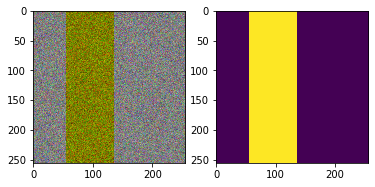

In [35]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X[0])
ax[1].imshow(y[0].reshape((256,256)))

In [36]:
from keras import backend as K

def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [37]:
model.compile(Adam(), loss=dice_coef_loss, metrics=[dice_coef])

In [38]:
model.fit(X, y, batch_size=4, epochs=5)

Epoch 1/5
10/10 [==============================] - 17s 2s/step - loss: 0.2009 - dice_coef: 0.7991
Epoch 2/5
10/10 [==============================] - 15s 2s/step - loss: 0.0617 - dice_coef: 0.9383
Epoch 3/5
10/10 [==============================] - 16s 2s/step - loss: 0.0110 - dice_coef: 0.9890
Epoch 4/5
10/10 [==============================] - 15s 2s/step - loss: 0.0072 - dice_coef: 0.9928
Epoch 5/5
10/10 [==============================] - 15s 2s/step - loss: 0.0059 - dice_coef: 0.9941


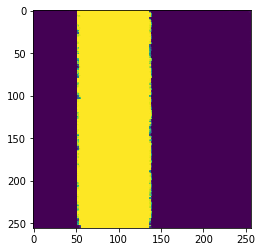

In [39]:
plt.imshow(model.predict(np.array([X[0],])).reshape((256,256)))